# Dataset: exp.csv

In [58]:
import pandas as pd
import seaborn as scs
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("../ml_datasets/exp.csv")

In [60]:
df.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


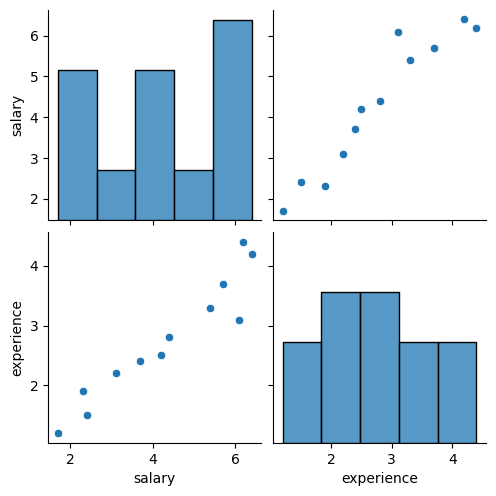

In [61]:
scs.pairplot(data=df)

In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = df[['experience']]
y = df[['salary']]
lr.fit(x,y)

LinearRegression()

In [63]:
lr.coef_, lr.intercept_

(array([[1.56709829]]), array([-0.03563861]))

In [64]:
y_pred = lr.predict(x)

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rscore = r2_score(y, y_pred)
print("Accuracy: ", rscore*100, "%")

Accuracy:  90.842569244828 %


In [66]:
mean_absolute_error(y,y_pred), mean_squared_error(y,y_pred)

(0.33208259760643516, 0.23366710810280555)

In [67]:
y_pred.shape, x.shape

((12, 1), (12, 1))

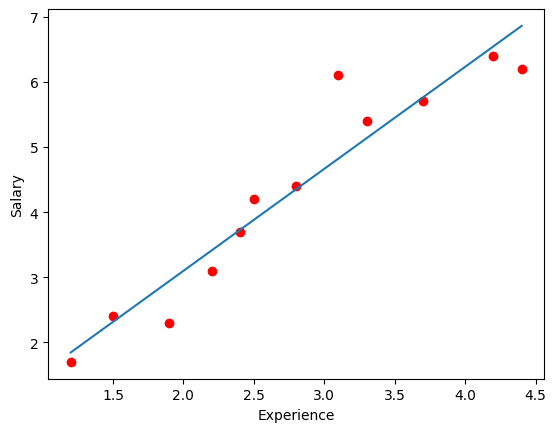

In [68]:
plt.scatter(x,y, color="red")
plt.plot(x,y_pred)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

## Non-linear Regression (Polynomial)

In [123]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=5)

In [124]:
xp= pf.fit_transform(x)
pr = LinearRegression()
pr.fit(xp, y)

LinearRegression()

In [125]:
pr.coef_, pr.intercept_

(array([[  0.        ,  33.52533697, -31.02773218,  13.78737836,
          -2.81565833,   0.21386845]]),
 array([-12.27038982]))

In [126]:
y_pred = pr.predict(xp)
rscore = r2_score(y, y_pred)
print("Accuracy: ", rscore*100, "%")

Accuracy:  96.15196736513161 %


In [127]:
mean_absolute_error(y,y_pred), mean_squared_error(y,y_pred)

(0.26695618656959996, 0.09818896606639173)

### Plotting Polynomial regression model

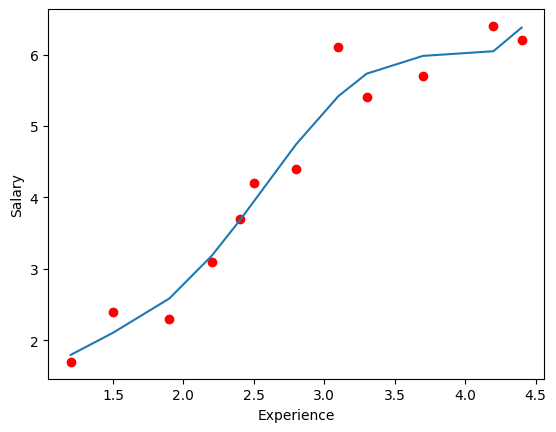

In [128]:
plt.scatter(x,y, color="red")
plt.plot(x,y_pred)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

### Using Ridge Regression as the model above cannot be decreased by features, but higher degrees can be regularized

In [129]:
from sklearn.linear_model import Ridge
r = Ridge()

In [160]:
r.fit(xp,y_pred, sample_weight=2)

Ridge()

In [134]:
r.coef_, r.intercept_

(array([[ 0.        ,  0.0075418 ,  0.11963455,  0.28551554, -0.06804744,
          0.00232295]]),
 array([1.16320547]))

In [135]:
y_pred = r.predict(xp)
rscore = r2_score(y, y_pred)
print("Accuracy: ", rscore*100, "%")

Accuracy:  95.2229432935367 %


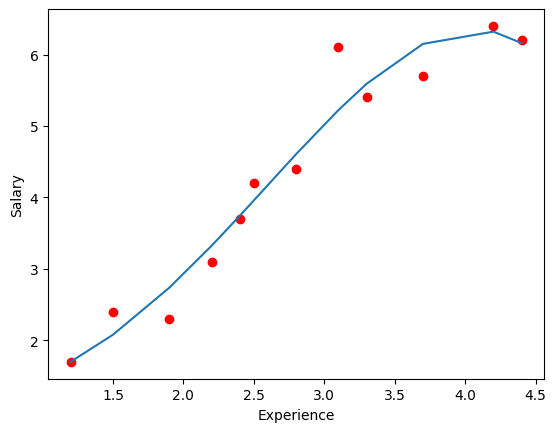

In [136]:
plt.scatter(x,y, color="red")
plt.plot(x,y_pred)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

## ElasticNet

In [154]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [155]:
en.fit(xp,y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.989e-01, tolerance: 3.062e-03
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [156]:
en.coef_, en.intercept_

(array([ 0.        ,  0.        ,  0.        ,  0.10493946,  0.03337703,
        -0.01041747]),
 array([1.86786036]))

In [157]:
y_pred = en.predict(xp)
rscore = r2_score(y, y_pred)
print("Accuracy: ", rscore*100, "%")

Accuracy:  93.90361513307653 %


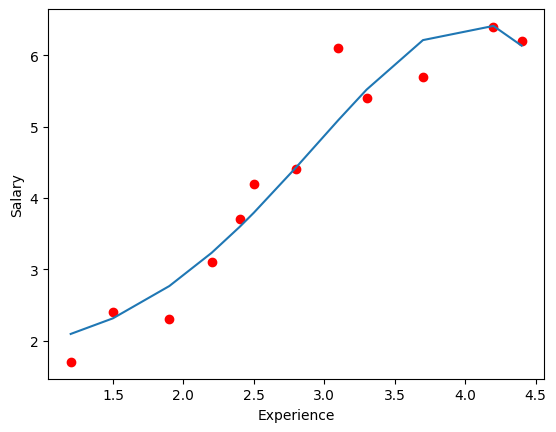

In [158]:
plt.scatter(x,y, color="red")
plt.plot(x,y_pred)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()